In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [23]:
df_real_swipes_normalized_numbered = pd.read_csv(f"data/User_01.csv", header=None).drop(33, axis=1)
df_gan_swipes_normalized_prof = pd.read_csv(f"data/GAN_01_10000.csv", header=None).drop(33, axis=1)
df_gan_swipes_normalized_numbered = pd.read_csv(f"data/GAN_mobile_50.csv", header=None)
df_gan_swipes_normalized_java = pd.read_csv(f"data/test.csv", header=None)


In [24]:
df_real_long = df_real_swipes_normalized_numbered.melt()
#df_real_long = df_real_swipes_normalized.melt()
df_real_long["variable"] = df_real_long["variable"] + 1
#df_real_long

In [25]:
df_gan_long = df_gan_swipes_normalized_numbered.melt()
#df_gan_long = df_gan_swipes_normalized.melt()
df_gan_long["variable"] = df_gan_long["variable"] + 1.1
#df_gan_long

In [26]:
df_gan_java_long = df_gan_swipes_normalized_java.melt()
#df_gan_long = df_gan_swipes_normalized.melt()
df_gan_java_long["variable"] = df_gan_java_long["variable"] + 1.2
#df_gan_java_long

In [27]:
df_gan_prof_long = df_gan_swipes_normalized_prof.melt()
#df_gan_long = df_gan_swipes_normalized.melt()
df_gan_prof_long["variable"] = df_gan_prof_long["variable"] + 1.3
#df_gan_prof_long

In [28]:
df_long = pd.concat([df_real_long, df_gan_long, df_gan_java_long, df_gan_prof_long], ignore_index=True)


#not used substitute by next implementation
#splits dataframe in equally big parts and does not take in consideration if feature are on same plot
number_of_different_samples = int(len(df_long["variable"].unique()) / 33)
df_long_part = df_long.sort_values(by="variable")

for data in np.array_split(df_long_part, number_of_different_samples):
    f, ax = plt.subplots(1, 1, figsize=(9.5,8))
    plt.xticks(rotation=90)
    ax = sns.boxplot(data=data, x="variable", y="value")
    plt.tight_layout()
    

<IPython.core.display.Javascript object>


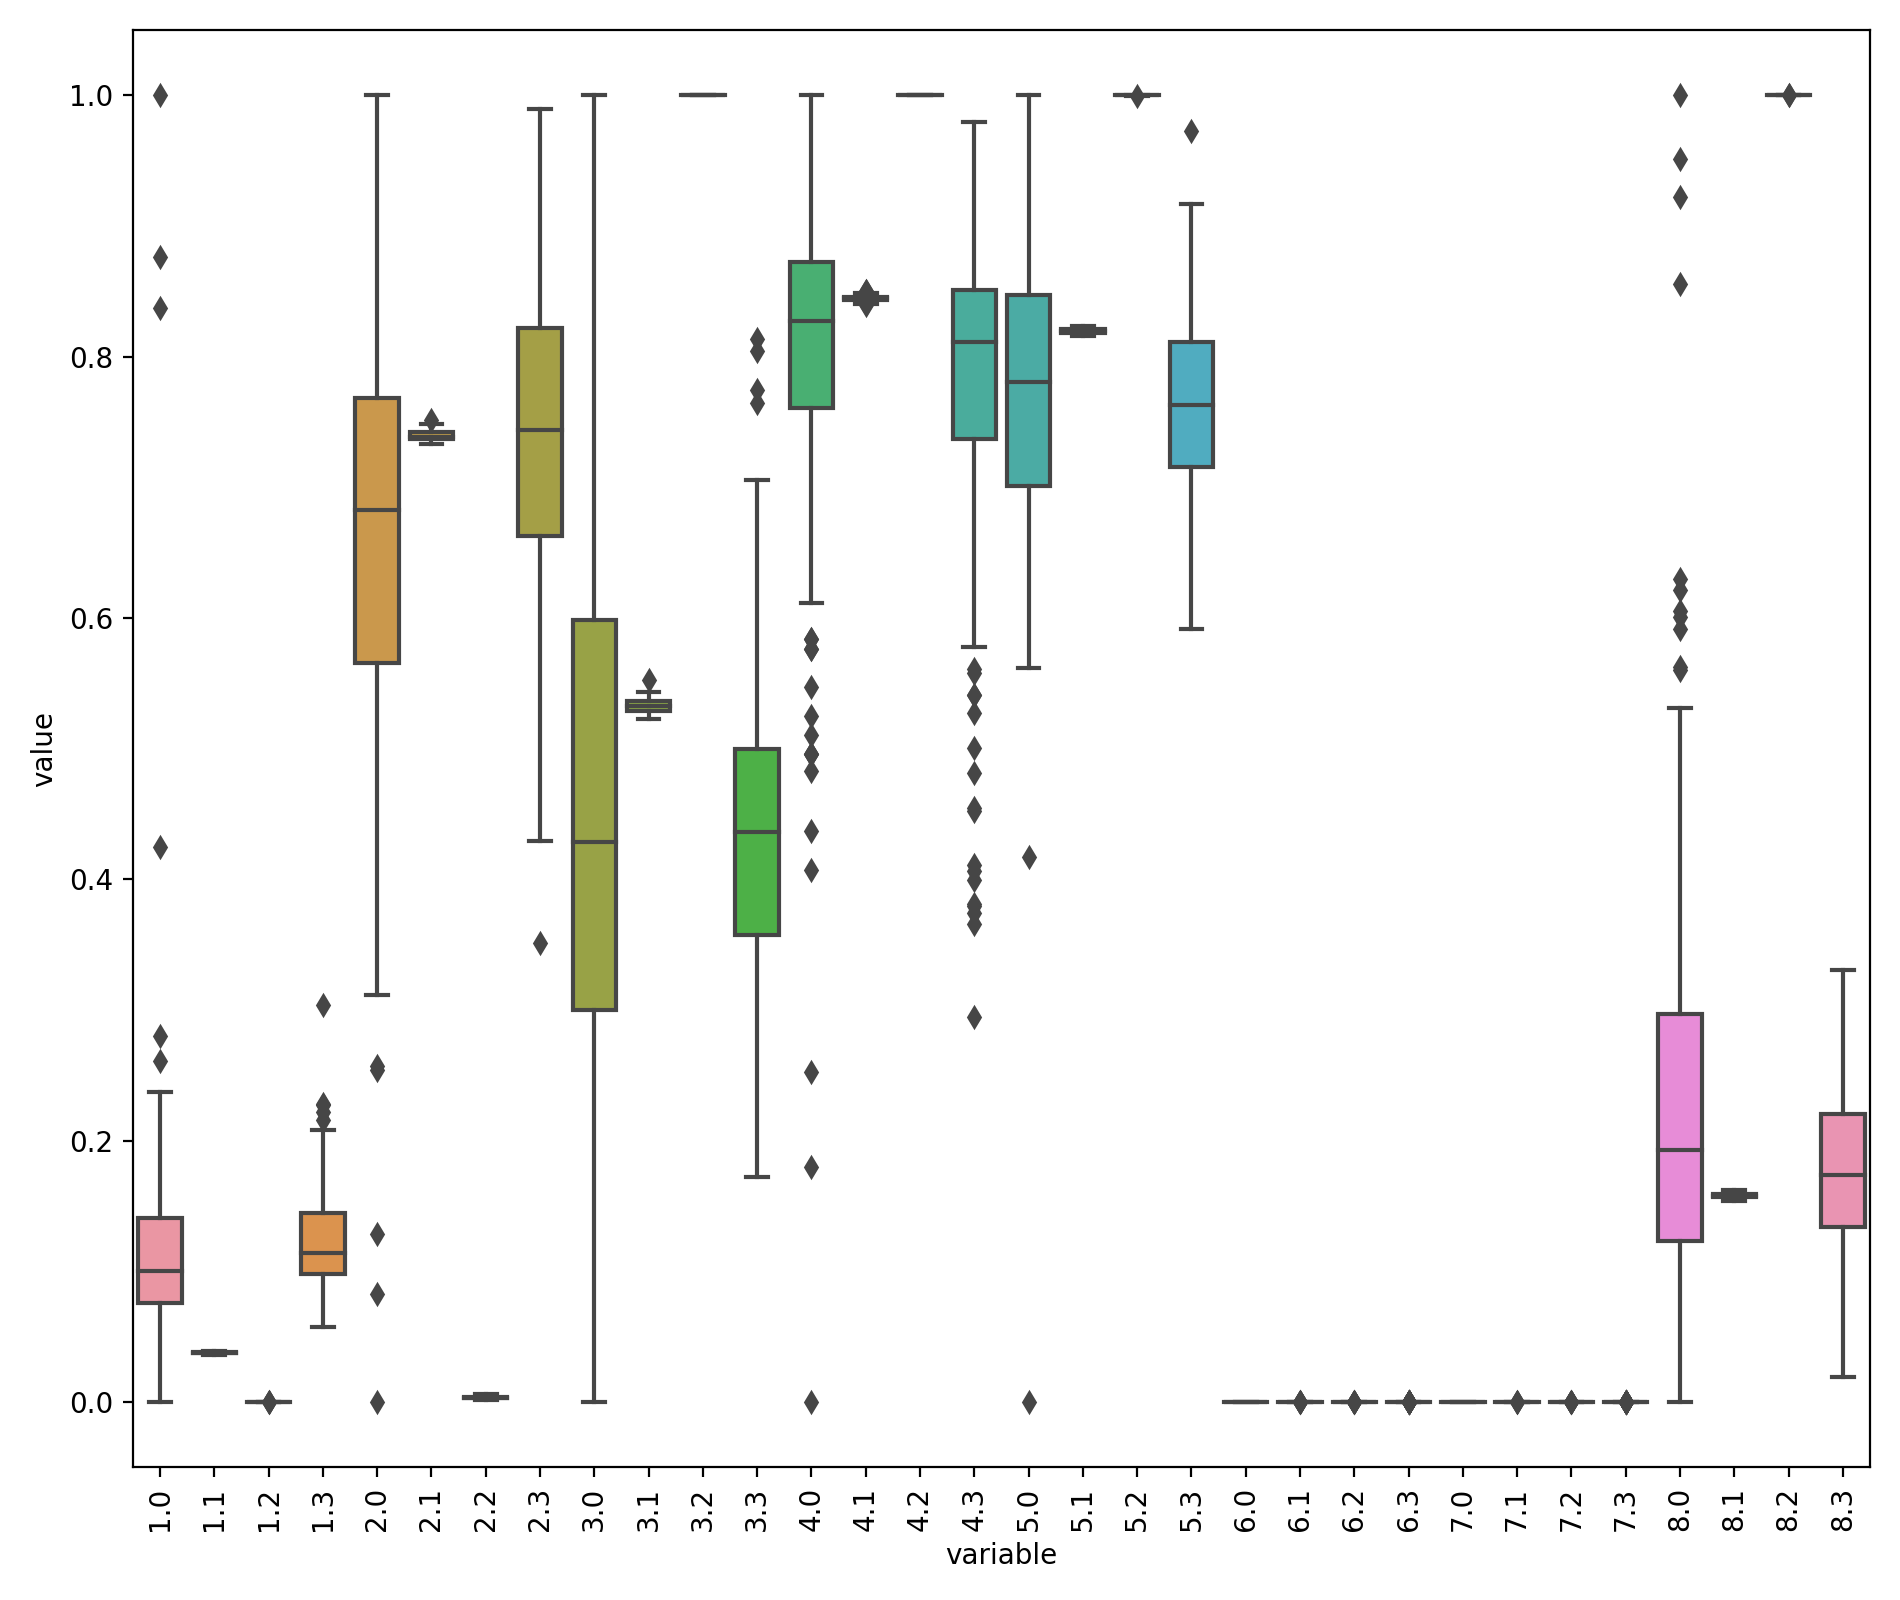

<IPython.core.display.Javascript object>


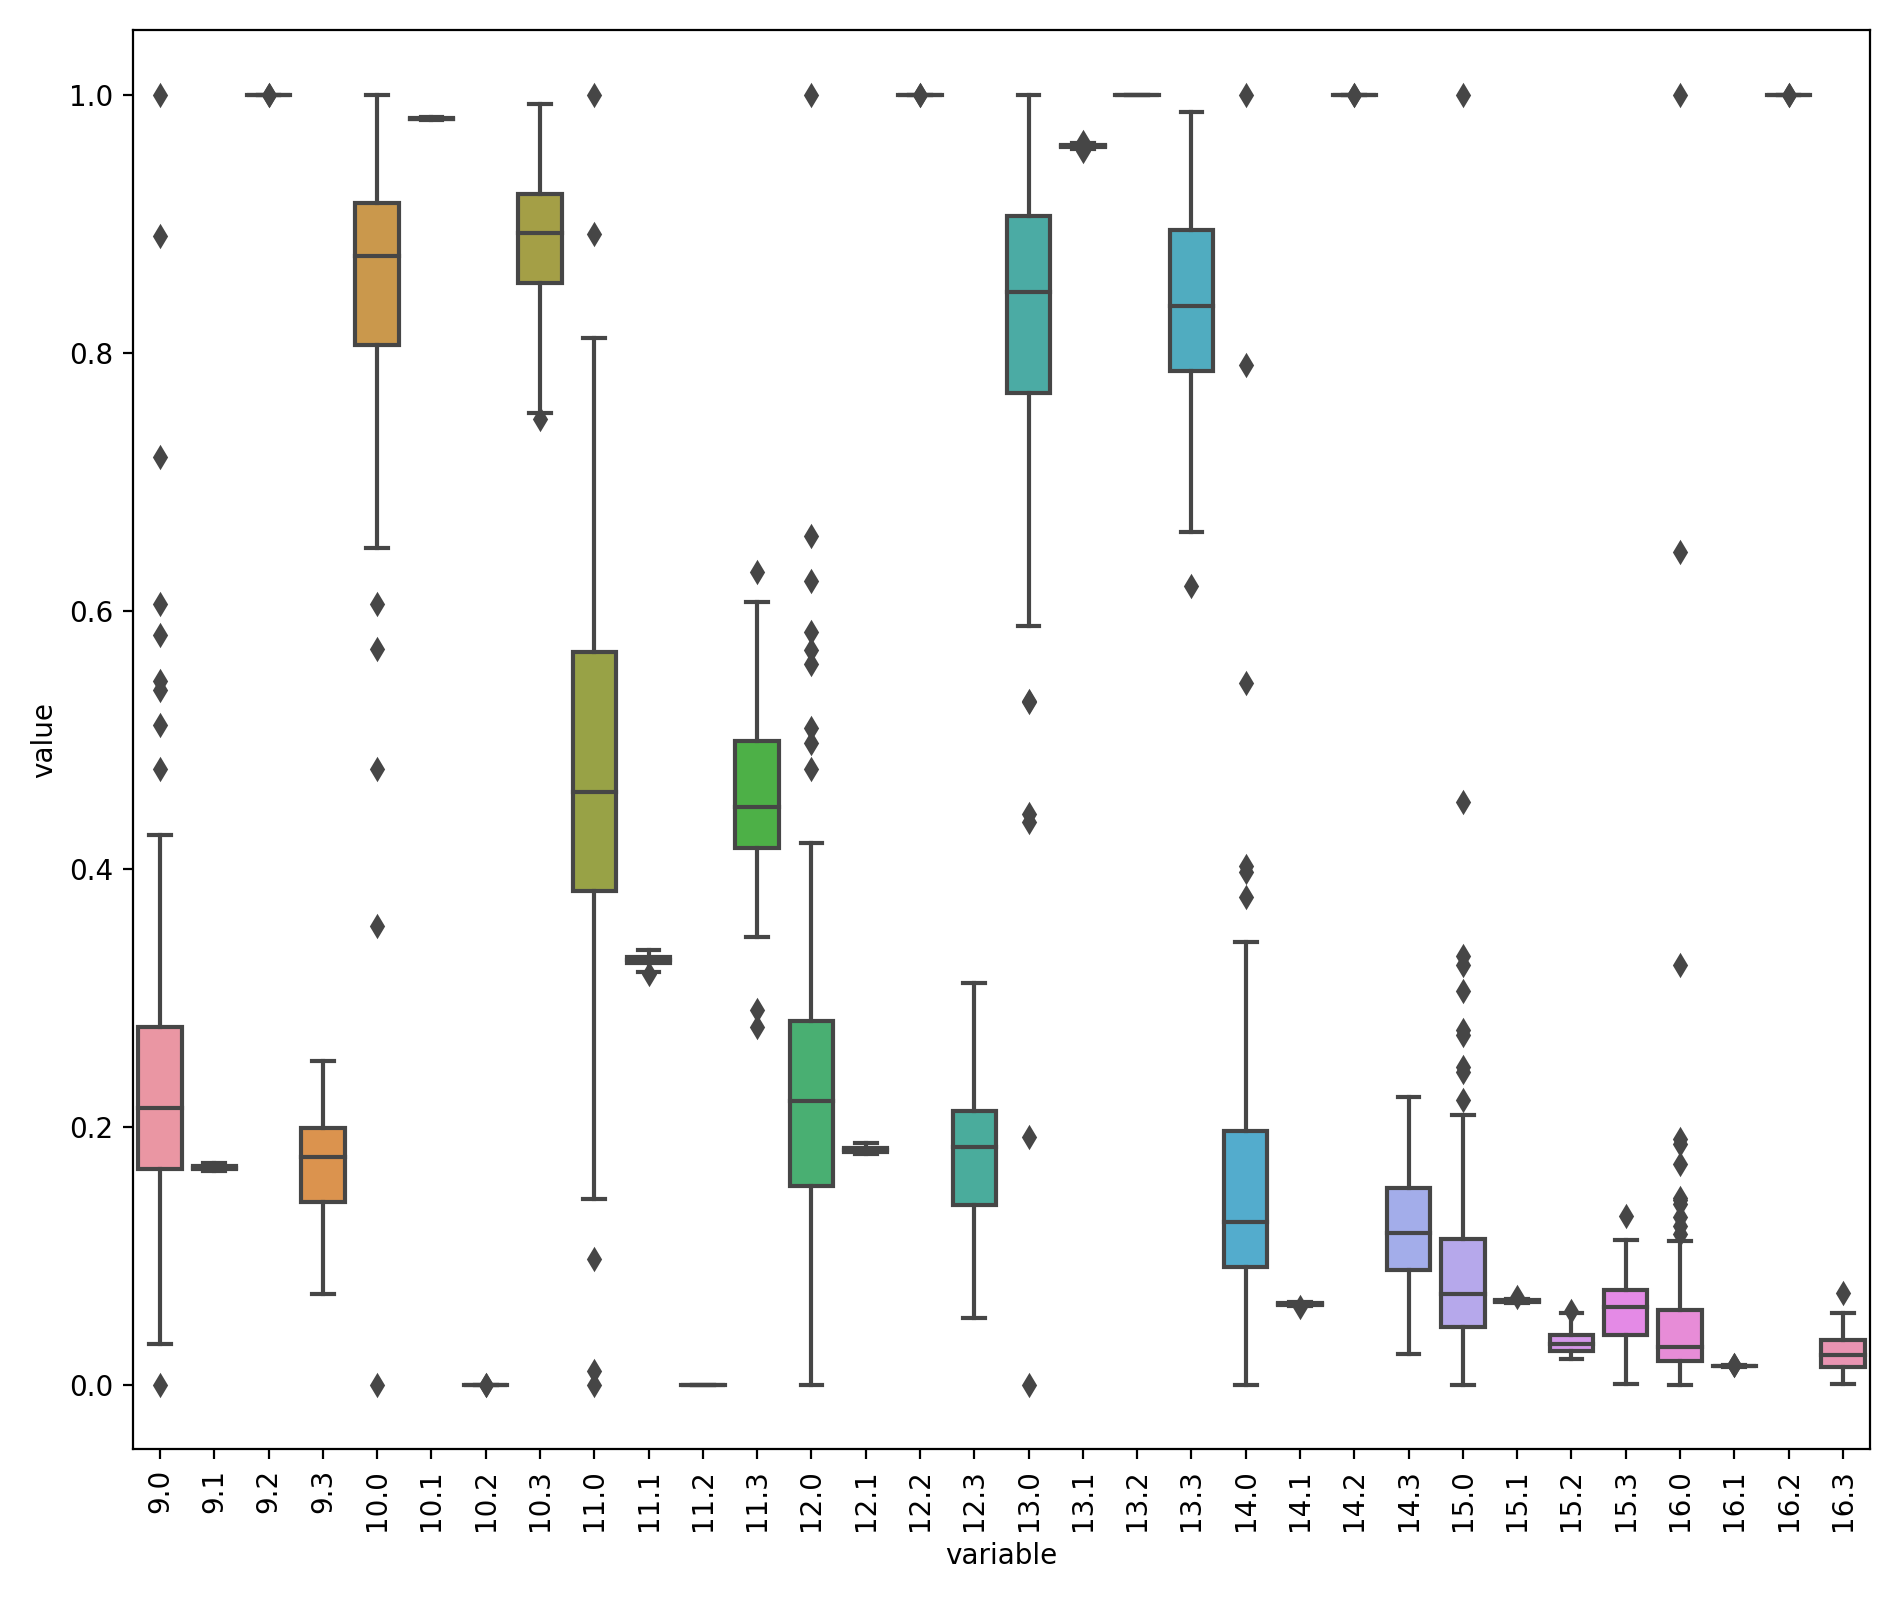

<IPython.core.display.Javascript object>


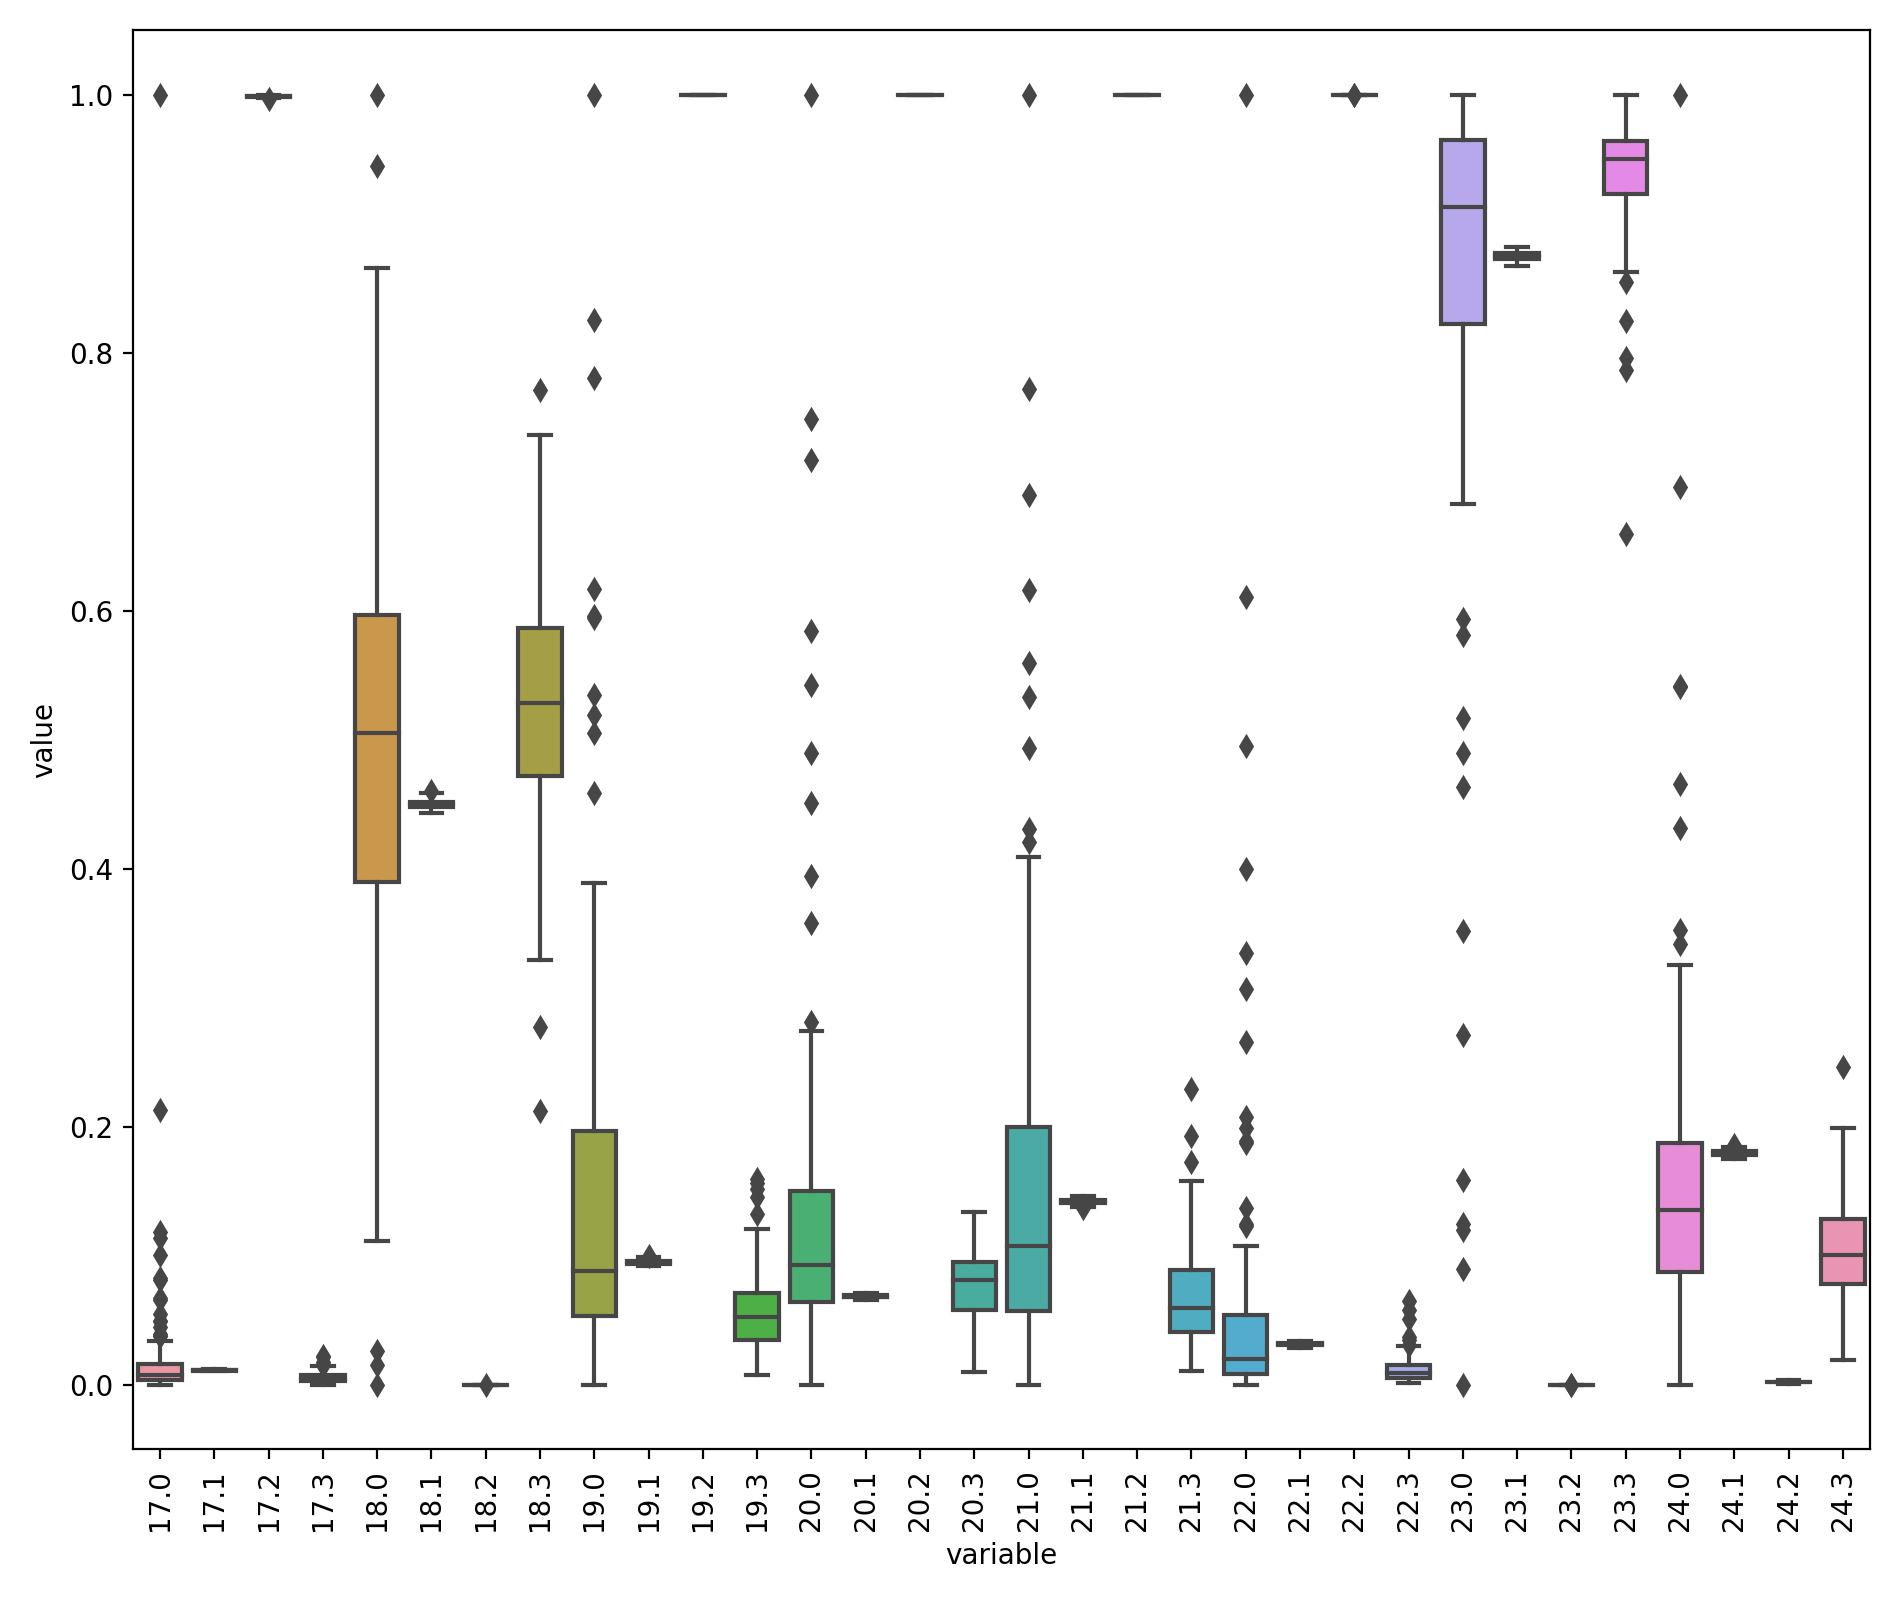

<IPython.core.display.Javascript object>


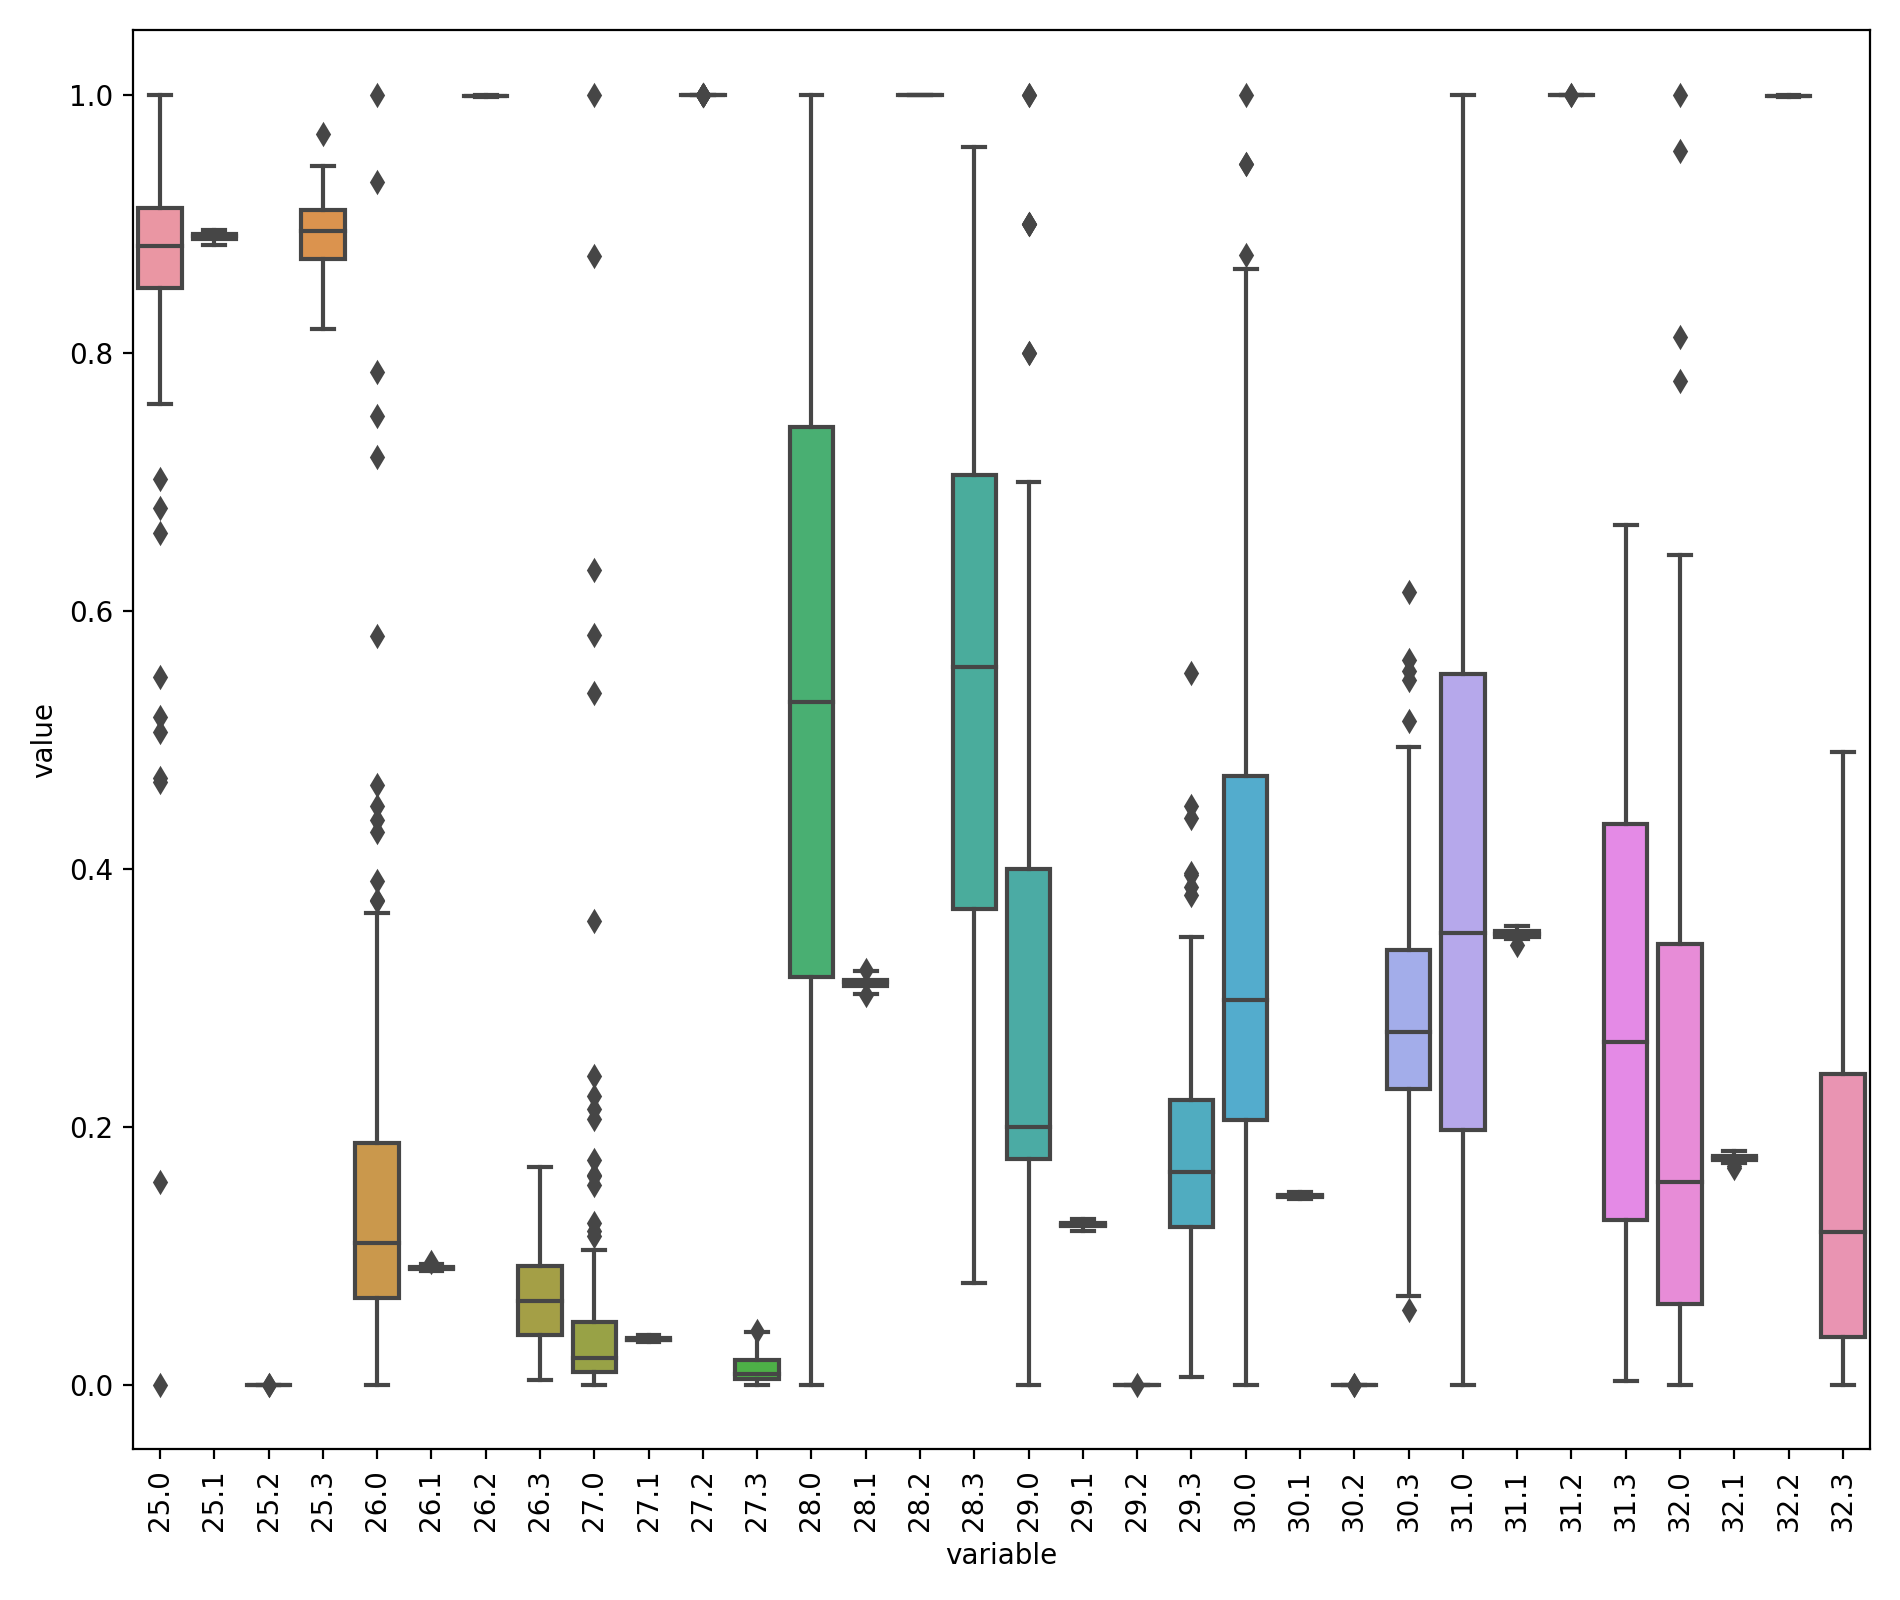

<IPython.core.display.Javascript object>


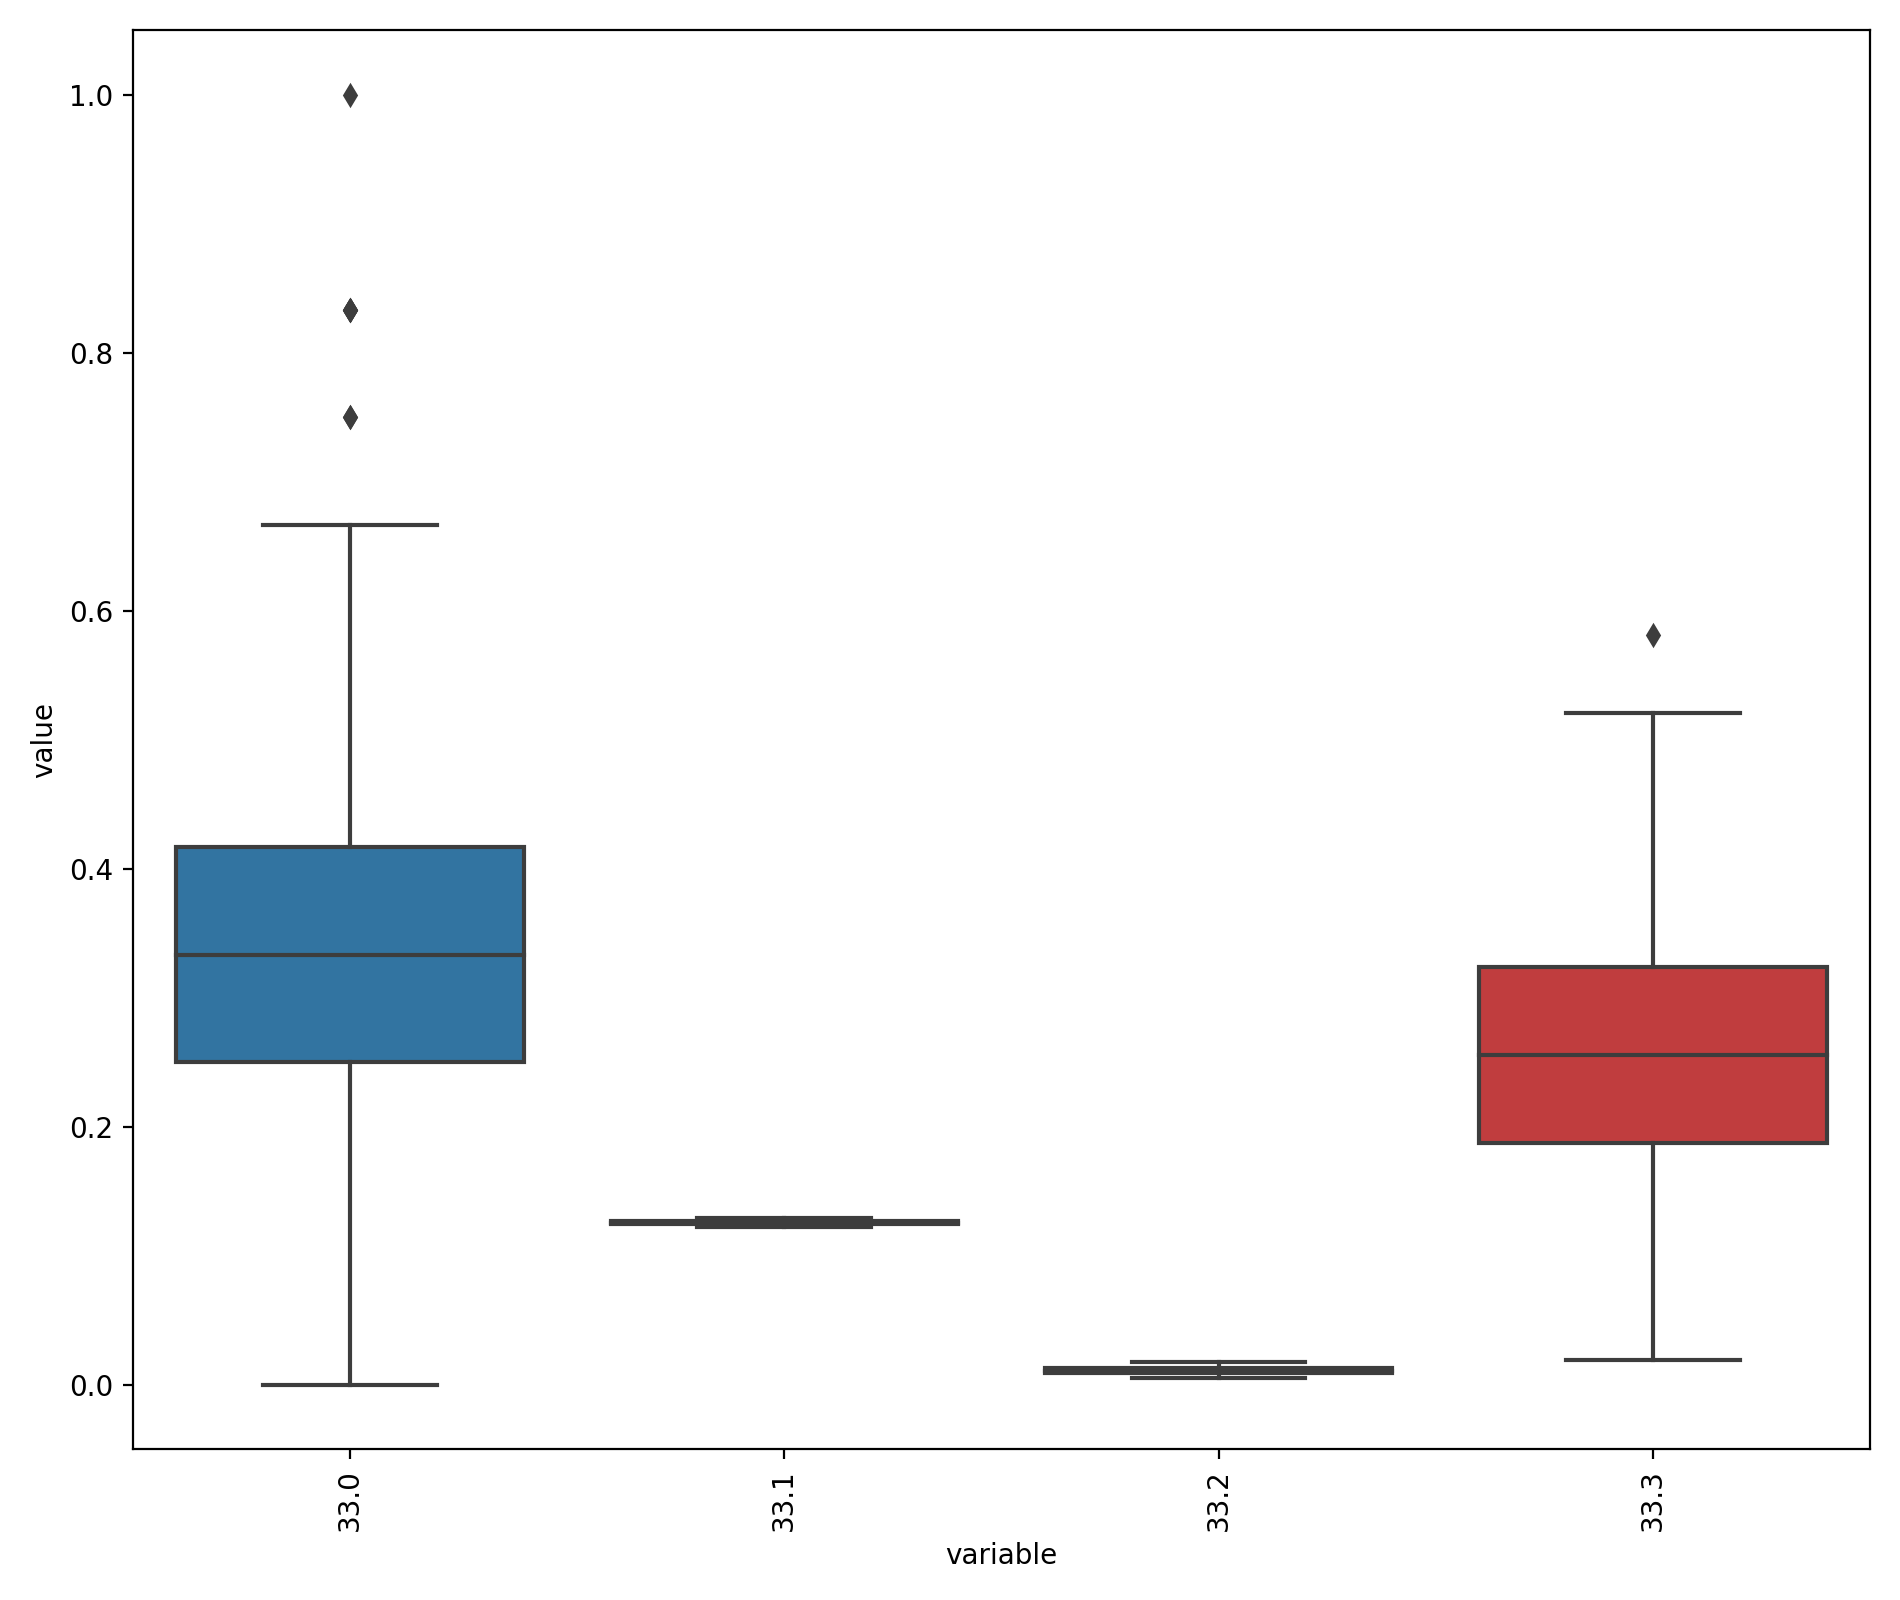

In [29]:
number_of_different_samples = int(len(df_long["variable"].unique()) / 33)
cut_for_plot = int(33 / number_of_different_samples)
min_feature = 0
max_feature = cut_for_plot + 1
while (max_feature < 34 + cut_for_plot):
    df_long_part = df_long[(df_long["variable"] >= min_feature) & (df_long["variable"] < max_feature)]
    f, ax = plt.subplots(1, 1, figsize=(9.5,8))
    plt.xticks(rotation=90)
    ax = sns.boxplot(data=df_long_part, x="variable", y="value")
    plt.tight_layout()
    min_feature = max_feature
    max_feature += cut_for_plot
